# How does the number of epochs of training affect model performance?

In [8]:
from koopman_probabilistic import *
from model_objs import *
import vanilla_benchmark

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm, skewnorm, skew

## Pinball Loss

In [9]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [10]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

## Vanilla Benchmark Forecast

In [11]:
min_train_start = 9 * 365 * 24 + 2 * 24  # 2 leap years in from 2005 to 2014
train_starts = np.linspace(min_train_start, min_train_start + 24 * 365 - 24, 12, endpoint=False).astype(int)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [5]:
print(list(train_starts))

[78888, 79616, 80344, 81072, 81800, 82528, 83256, 83984, 84712, 85440, 86168, 86896]


In [6]:
zone_name = "ISONE CA"

In [12]:
vanilla_losses = [296.8847544483837, 430.00821029385423, 249.76186323507005, 228.45341573067495, 367.92242571414795, 359.81620926123105, 573.6220447228848, 663.6710716952123, 596.4665211942336, 211.61053854835038, 309.02862777154513, 430.58429049360274]

In [28]:
vanilla_losses = []
for month in range(1, len(months) + 1):
    vanilla_losses.append(vanilla_benchmark.get_lossesGEFCom(10, 31 * 24, start_date=pd.Timestamp(f"2005-{month}-01"), zones=["ISONE CA"],
                              delay_days=0, temp_years=[2014], plot=True)["ISONE CA"])

ISONE CA


KeyboardInterrupt: 

In [27]:
for i, loss in list(enumerate(vanilla_losses))[::3]:
    print(np.round(loss, 1), end="\t")

232.6	232.6	232.6	232.6	

In [20]:
import json

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))

NameError: name 'zone_name' is not defined

In [ ]:
# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)

# Forecasting mean, variance, and skewness of Skew-Normal distribution

In [25]:
# cumul_iters = np.array([0, 50, 100, 150, 200, 300, 450, 600, 800, 1000])
cumul_iters = np.array([0, 600, 800])
iter_steps = cumul_iters[1:] - cumul_iters[:-1]

In [26]:
%matplotlib inline
z_scores_lists = []
test_z_scores_lists = []
losses_lists = []
relative_perfs = []

TRAIN START: 78888 = 2014-01-01 00:00:00
x (9504, 1)
xt (8760, 1)
working on 600 ...
Loss at iteration 10: 1.556668713881351
Loss at iteration 60: -1.7313558175062125
Loss at iteration 110: -1.8850067625313618
Loss at iteration 160: -1.9191028348160577
Loss at iteration 210: -1.9830065101809
Loss at iteration 260: -2.0065508684801117
Loss at iteration 310: -2.0333376593718713
Loss at iteration 360: -2.051358331303464
Loss at iteration 410: -2.0677898520242475
Loss at iteration 460: -2.0815441965485073
Loss at iteration 510: -2.0968332515572476
Loss at iteration 560: -2.11230299367591
Final loss: -2.123465871211944


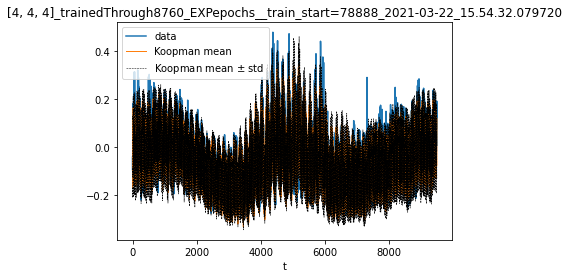

actual overall mean: 0  predicted mean: -0.028058434


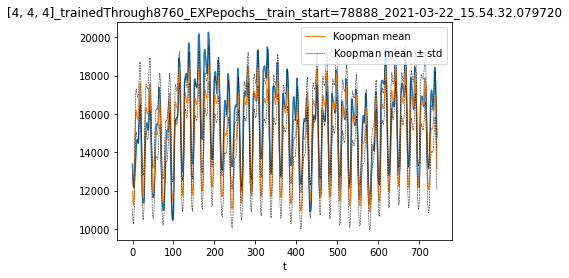

pinball_loss: 324.5261130279281
-32352.611302792808% performance relative to vanilla benchmark





working on 800 ...
Loss at iteration 10: -2.1263762627825478
Loss at iteration 60: -2.137954374534986
Loss at iteration 110: -2.1481173592649783
Loss at iteration 160: -2.1582864555725196
Final loss: -2.1661793467211665


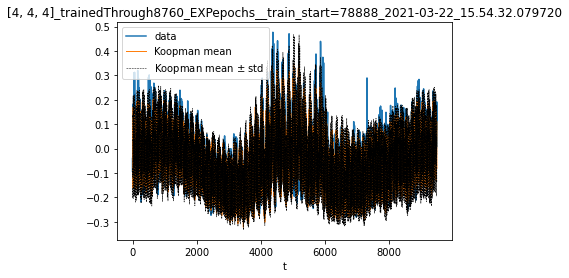

actual overall mean: 0  predicted mean: -0.02684735


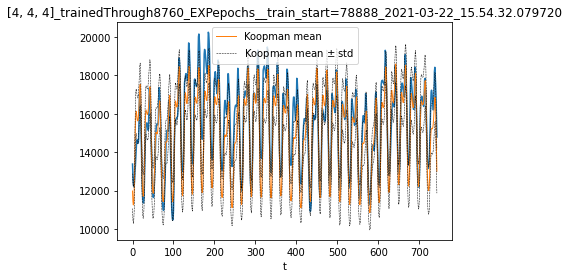

pinball_loss: 331.24470637181093
-33024.47063718109% performance relative to vanilla benchmark





TRAIN START: 81072 = 2014-04-02 00:00:00
x (9504, 1)
xt (8760, 1)
working on 600 ...
Loss at iteration 10: 1.5212586754446782
Loss at iteration 60: -1.6539556423429806
Loss at iteration 110: -1.902855394155079
Loss at iteration 160: -1.9657197849545744
Loss at iteration 210: -2.0138709183137085
Loss at iteration 260: -2.0456975876749515
Loss at iteration 310: -2.0668915971651534
Loss at iteration 360: -2.0799355540602247
Loss at iteration 410: -2.092791199136365
Loss at iteration 460: -2.1064297027986023
Loss at iteration 510: -2.121287384900764
Loss at iteration 560: -2.136831850021674
Final loss: -2.148394407567615


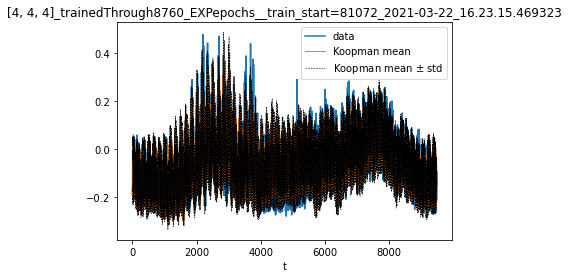

actual overall mean: 0  predicted mean: -0.015329335


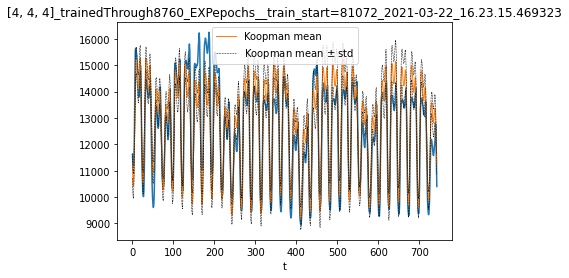

pinball_loss: 234.06806928457374
-23306.806928457372% performance relative to vanilla benchmark





working on 800 ...
Loss at iteration 10: -2.1515151587452133
Loss at iteration 60: -2.1650401919532087
Loss at iteration 110: -2.1778238272078
Loss at iteration 160: -2.189965961103944
Final loss: -2.1988845579207483


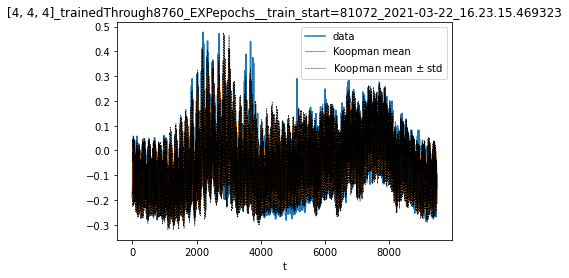

actual overall mean: 0  predicted mean: -0.015469855


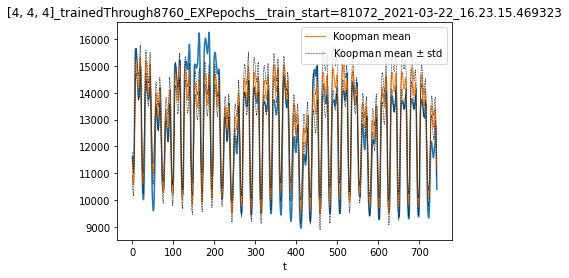

pinball_loss: 235.25215575046929
-23425.21557504693% performance relative to vanilla benchmark





TRAIN START: 83256 = 2014-07-02 00:00:00
x (9504, 1)
xt (8760, 1)
working on 600 ...
Loss at iteration 10: 1.5677258144766903
Loss at iteration 60: -1.5813467053313546
Loss at iteration 110: -1.7661052263263293
Loss at iteration 160: -1.8420487911821197
Loss at iteration 210: -1.8933101805424941
Loss at iteration 260: -1.929524178817503
Loss at iteration 310: -1.9543196427196479
Loss at iteration 360: -1.9676190951091512
Loss at iteration 410: -1.9782730589733701
Loss at iteration 460: -1.98743555307677
Loss at iteration 510: -1.995992823688678
Loss at iteration 560: -2.0045712408997236
Final loss: -2.011860798266787


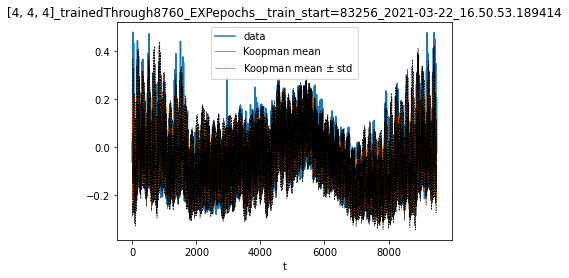

actual overall mean: 0  predicted mean: -0.023082191


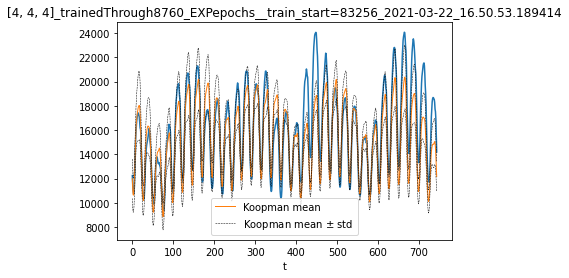

pinball_loss: 527.8705775103474
7.972353990525216% performance relative to vanilla benchmark





working on 800 ...
Loss at iteration 10: -2.0139860364915942
Loss at iteration 60: -2.023325361624726
Loss at iteration 110: -2.031977444881891
Loss at iteration 160: -2.0401266545356007
Final loss: -2.0461358833331706


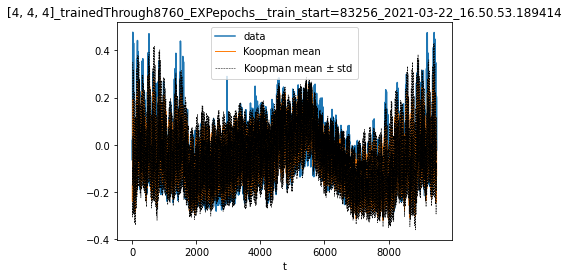

actual overall mean: 0  predicted mean: -0.0228163


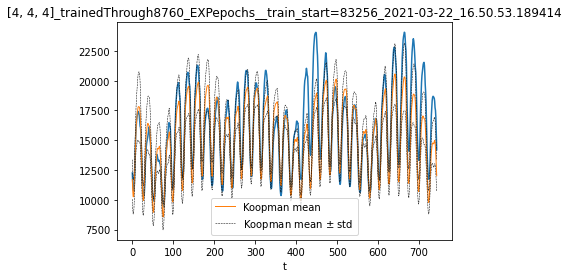

pinball_loss: 525.0181883645664
8.469632432955654% performance relative to vanilla benchmark





TRAIN START: 85440 = 2014-10-01 00:00:00
x (9504, 1)
xt (8760, 1)
working on 600 ...
Loss at iteration 10: 1.588163779962753
Loss at iteration 60: -1.7004083723044103
Loss at iteration 110: -1.7561263957594058
Loss at iteration 160: -1.8102303682382268
Loss at iteration 210: -1.8579671047206217
Loss at iteration 260: -1.8819457951287268
Loss at iteration 310: -1.90415549831774
Loss at iteration 360: -1.9295331353146048
Loss at iteration 410: -1.9599700755241973
Loss at iteration 460: -1.982385113683981
Loss at iteration 510: -2.0013304790669073
Loss at iteration 560: -2.0185156391231356
Final loss: -2.030943944725566


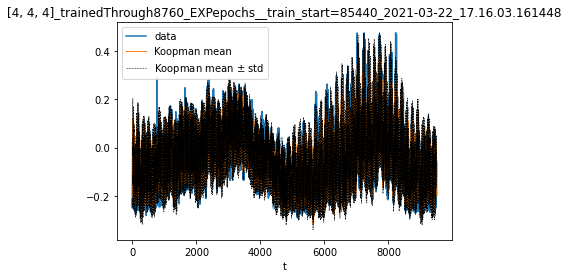

actual overall mean: 0  predicted mean: -0.0053727464


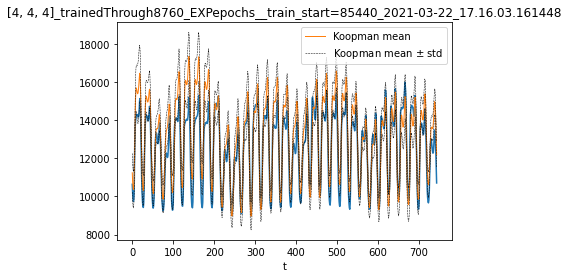

pinball_loss: 275.75815499498515
-27475.815499498516% performance relative to vanilla benchmark





working on 800 ...
Loss at iteration 10: -2.0343084540736536
Loss at iteration 60: -2.0484721811889797
Loss at iteration 110: -2.0605994636637024
Loss at iteration 160: -2.071079064456977
Final loss: -2.078338227566233


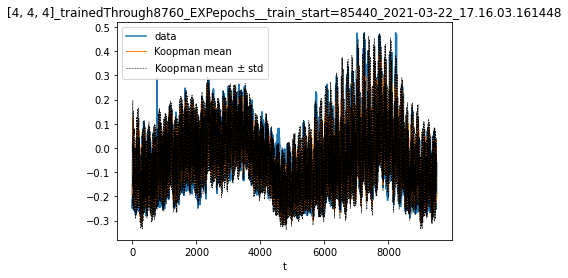

actual overall mean: 0  predicted mean: -0.004648738


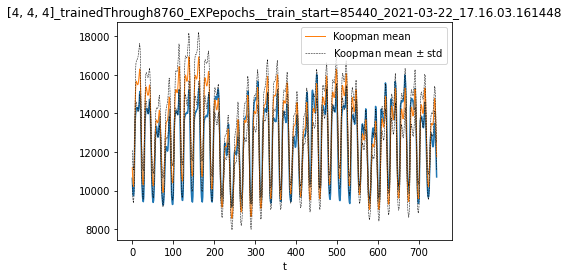

pinball_loss: 253.3388873018673
-25233.88873018673% performance relative to vanilla benchmark







In [27]:
for month, train_start in list(enumerate(train_starts))[::3]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    z_scores_lists.append([])
    test_z_scores_lists.append([])
    losses_lists.append([])
    relative_perfs.append([])
    
    train_through = 365 * 24
    delay = 0  # 52 * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    num_freqs = [4, 4, 4]
    num_fourier = 4
    loss_weights = 1 + 0.4 * torch.cos(torch.linspace(0, 2 * np.pi, xt.shape[0]))
    print("x", x.shape)
    print("xt", xt.shape)
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPepochs_" + f"_train_start={train_start}_" + now

        
    ### TRAIN ###
    model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=256)
    k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
    
    k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])
    
    for i, iters in enumerate(iter_steps):
        print("working on", cumul_iters[i+1], "...")
    
        k.fit(xt, iterations=iters, verbose=False, cutoff=0, weight_decay=1e-3, lr_theta=1e-4, lr_omega=0);
        
        fname = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{cumul_iters[i+1]}soFar_{num_freqs}"
        mu_file = fname + "mu.npy"
        sigma_file = fname + "sigma.npy"
        alpha_file = fname + "alpha.npy"    
    
        ### FORECAST ###
        params = k.predict(predict_through)
        mu_hat, sigma_hat, a_hat = params
        
        np.save(mu_file, mu_hat)
        np.save(sigma_file, sigma_hat)
        np.save(alpha_file, a_hat)

        mean_hat = model.mean(params)
        std_hat = model.std(params)

        dim = 0
        plt.figure()
        # plt.scatter(np.arange(-slc), x[slc:], label="data")
        plt.plot(x[:predict_through, dim], label="data")
        plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
        plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
        plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
        #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
        #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

        plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
        plt.xlabel("t")
        plt.legend()
        plt.show()

        ### ANALYTICS ###
        print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

        z_scores_lists[-1].append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
        test_z_scores_lists[-1].append(
            (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
             / std_hat[train_through + delay:predict_through])

        ### PERFORMANCE ###

        #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
        test_start = train_through + delay
        sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
        delta = ah / (1 + ah ** 2) ** 0.5
        muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
        muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
        sigh = sigh * rnge
        mean_hat = model.mean([muh, sigh, ah])
        std_hat = model.std([muh, sigh, ah])

        plt.figure()
        plt.plot(x_original[train_start:][test_start: predict_through])
        plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
        plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
        plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
        # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
        # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
        plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
        plt.xlabel("t")
        plt.legend()
        plt.show()

        loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)[0]
        relative = (1 - loss/vanilla_losses[month]) * 100
        print("pinball_loss:", loss)
        print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
        losses_lists[-1].append(loss)
        relative_perfs[-1].append(relative)



# Figures

In [28]:
%matplotlib inline

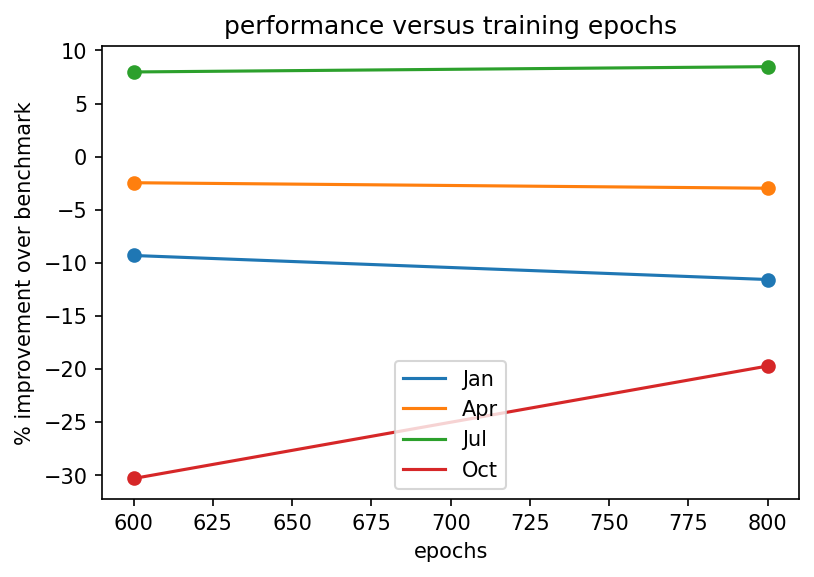

In [42]:
plt.figure(dpi=150)
plt.plot(cumul_iters[1:], relative_perfs[0], label="Jan")
plt.scatter(cumul_iters[1:], relative_perfs[0])
plt.plot(cumul_iters[1:], relative_perfs[1], label="Apr")
plt.scatter(cumul_iters[1:], relative_perfs[1])
plt.plot(cumul_iters[1:], relative_perfs[2], label="Jul")
plt.scatter(cumul_iters[1:], relative_perfs[2])
plt.plot(cumul_iters[1:], relative_perfs[3], label="Oct")
plt.scatter(cumul_iters[1:], relative_perfs[3])
plt.legend()
plt.title("performance versus training epochs")
plt.xlabel("epochs")
plt.ylabel("% improvement over benchmark")
plt.show()

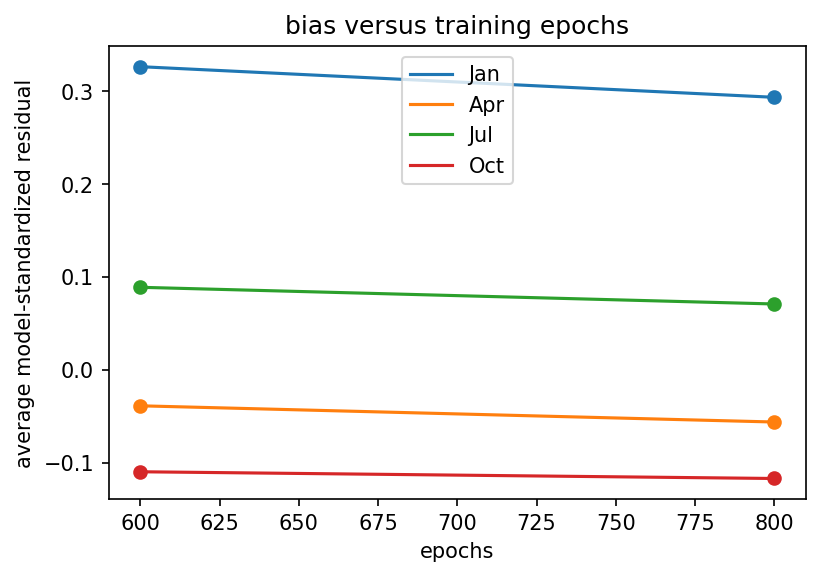

In [30]:
plt.figure(dpi=150)
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[1], axis=1), label="Apr")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[1], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[2], axis=1), label="Jul")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[2], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[3], axis=1), label="Oct")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[3], axis=1))
plt.legend()
plt.title("bias versus training epochs")
plt.xlabel("epochs")
plt.ylabel("average model-standardized residual")
plt.show()

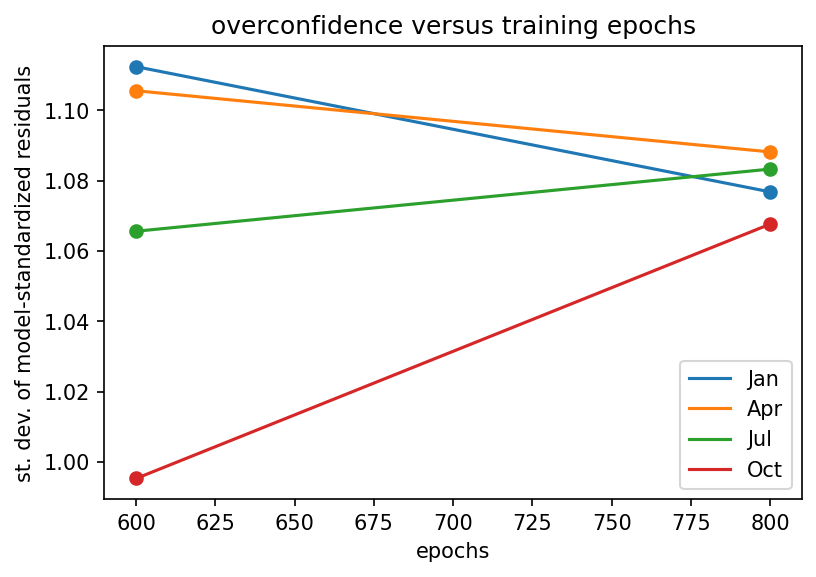

In [31]:
plt.figure(dpi=150)
plt.plot(cumul_iters[1:], np.std(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[0], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[1], axis=1), label="Apr")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[1], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[2], axis=1), label="Jul")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[2], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[3], axis=1), label="Oct")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[3], axis=1))
plt.legend()
plt.title("overconfidence versus training epochs")
plt.xlabel("epochs")
plt.ylabel("st. dev. of model-standardized residuals")
plt.show()

In [43]:
z_scores_lists = np.array(z_scores_lists)
test_z_scores_lists = np.array(test_z_scores_lists)
losses_lists = np.array(losses_lists)
relative_perfs = np.array(relative_perfs)

In [44]:
np.save("experiments\\" + data_name + "z_scores_lists.npy", z_scores_lists)
np.save("experiments\\" + data_name + "test_z_scores_lists.npy", test_z_scores_lists)
np.save("experiments\\" + data_name + "relative_perfs.npy", relative_perfs)
np.save("experiments\\" + data_name + "losses_lists.npy", losses_lists)

In [2]:
z_scores_lists = np.load("experiments\\" + "EXPepochs__train_start=86168_2021-03-08_23.58.21.175735z_scores_lists.npy")

<IPython.core.display.Javascript object>


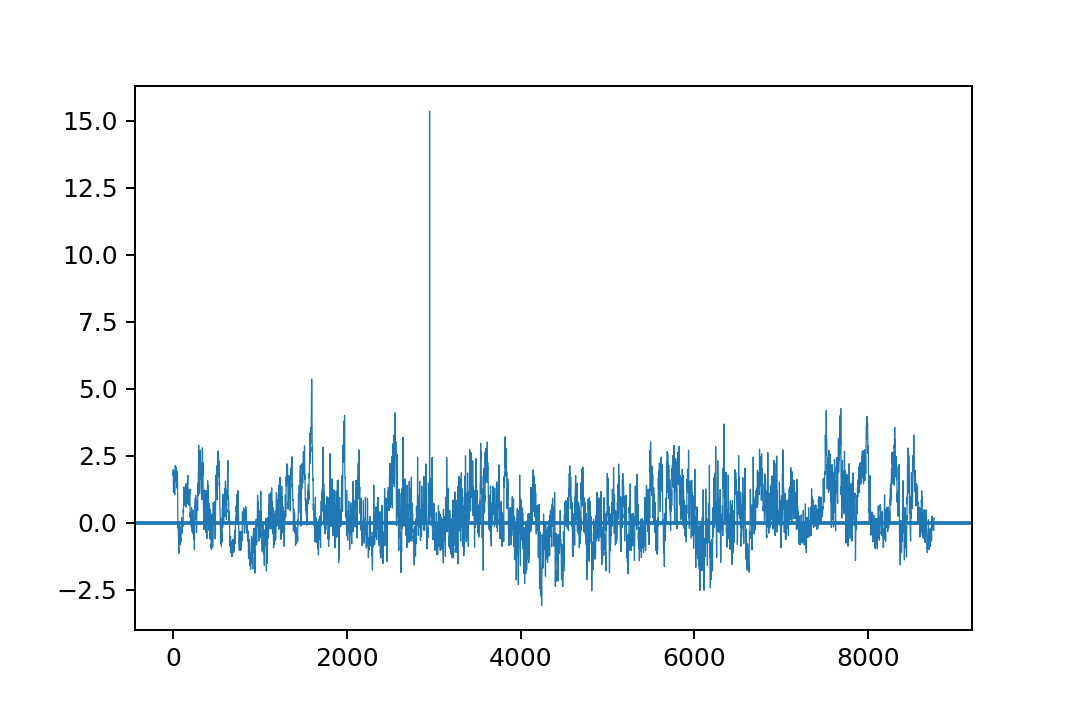

In [24]:
%matplotlib notebook
plt.figure(dpi=150)
plt.plot(z_scores_lists[0, -1, :, 0].T, linewidth=0.5)
plt.axhline(0)

In [5]:
z_scores_lists.shape

(4, 9, 8760, 1)